In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [18]:
with open('../nets/IPMLB_FULL.p', 'rb') as f:
  cnn = pickle.load(f)
cnn.uuid = 'IPMLB'

In [5]:
import numpy as np
import mahotas as mh
sys.path.append('../gp/')
import tifffile as tif

In [191]:
def cr(z_in):
    images = []
    probs = []
    golds = []
    rhoanas = []
    for z in range(z_in,z_in+1): #70,72

        image = tif.imread('/home/d/data/ac3/image/ac3_input_'+str(z).zfill(4)+'.tif')[100:800,100:800]
        #prob  = tif.imread('/home/d/data/ac3/prob/ac3_input_'+str(z).zfill(4)+'_syn.tif')[100:800,100:800]
        prob = mh.imread('/home/d/data/ac3/probnew/000000092_000000092_'+str(z).zfill(9)+'_membrane-membrane.png')[100:800,100:800]
        gold = tif.imread('/home/d/data/ac3/gold/ac3_labels_'+str(z).zfill(4)+'.tif')[100:800,100:800]
        rhoana = tif.imread('/home/d/data/ac3/rhoana/z='+str(z).zfill(8)+'.tif')[100:800,100:800]
#         rhoana = mh.imread('/home/d/data/ac3/rhoananew/000000092_000000092_'+str(z).zfill(9)+'_neuroproof.png')[100:800,100:800]
        
#         rhoana_single = np.zeros((rhoana.shape[0], rhoana.shape[1]), dtype=np.uint64)
#         rhoana_single[:, :] = rhoana[:,:,0]*256*256 + rhoana[:,:,1]*256 + rhoana[:,:,2]
#         rhoana = rhoana_single
#        print rhoana.shape, prob.shape

#         image, prob, mask, gold, rhoana = gp.Util.read_section('/home/d/data/cylinderNEW/', z)

#         images.append(image)
#         probs.append(prob)
#         golds.append(gold.astype(np.uint64))
#         rhoanas.append(rhoana.astype(np.uint64))

    bigM = gp.Legacy.create_bigM_without_mask(cnn, images, probs, rhoanas, verbose=True, max=1000000)

    bigM_cylinder_after_95, out_cylinder_volume_after_auto_95, cylinder_auto_fixes_95, cylinder_auto_vi_s_95, vi_s_per_step2 = gp.Legacy.splits_global_from_M_automatic(
        cnn, bigM, images, probs, rhoanas, golds, sureness_threshold=.8)

    initial_median_vi = gp.Legacy.VI(golds, rhoanas)[0]
    
    return cylinder_auto_fixes_95, vi_s_per_step2, initial_median_vi

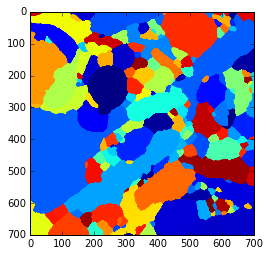

In [180]:
imshow(rhoanas[0])





In [181]:
groups = []
for z in range(50,55):
    fixes, vis, initialvi = cr(z)
    groups.append((fixes, vis, initialvi))

Loading z00000050.png
7104 generated in 379.008018017 seconds.
Grouped into 1744 patches in 0.0333898067474 seconds.
30 minutes done bigM_max= 0.994783639908
0.772613942623
Loading z00000051.png
6808 generated in 410.448157072 seconds.
Grouped into 1673 patches in 0.0311939716339 seconds.
30 minutes done bigM_max= 0.993903338909
0.791213452816
Loading z00000052.png
6908 generated in 345.054610014 seconds.
Grouped into 1693 patches in 0.0311348438263 seconds.
30 minutes done bigM_max= 0.995615720749
0.786356687546
Loading z00000053.png
6908 generated in 343.931591988 seconds.
Grouped into 1704 patches in 0.0306158065796 seconds.
30 minutes done bigM_max= 0.995332181454
0.792803943157
Loading z00000054.png
6908 generated in 346.02509594 seconds.
Grouped into 1697 patches in 0.0320188999176 seconds.
30 minutes done bigM_max= 0.994084119797
0.796086192131


In [189]:
v100 = [0]*len(groups)
v99 = [0]*len(groups)
v98 = [0]*len(groups)
v97 = [0]*len(groups)
v96 = [0]*len(groups)
v95 = [0]*len(groups)
v94 = [0]*len(groups)
v93 = [0]*len(groups)
v92 = [0]*len(groups)
v91 = [0]*len(groups)
i100 = [0]*len(groups)
i99 = [0]*len(groups)
i98 = [0]*len(groups)
i97 = [0]*len(groups)
i96 = [0]*len(groups)
i95 = [0]*len(groups)
i94 = [0]*len(groups)
i93 = [0]*len(groups)
i92 = [0]*len(groups)
i91 = [0]*len(groups)
for z,g in enumerate(groups):
    
    for i,f in enumerate(g[0]):
        # looping through fixes
        if f[1] >= 0.99:
            # add to 100 box
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            print g[2],curvi
            v100[z] = diffvi
            i100[z] = i
            
        elif f[1] >= 0.98:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v99[z] = diffvi
            i99[z] = i
        elif f[1] >= 0.97:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v98[z] = diffvi
            i98[z] = i
        elif f[1] >= 0.96:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v97[z] = diffvi
            i97[z] = i
        elif f[1] >= 0.95:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v96[z] = diffvi
            i96[z] = i
        elif f[1] >= 0.94:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v95[z] = diffvi
            i95[z] = i
        elif f[1] >= 0.93:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v94[z] = diffvi
            i94[z] = i
        elif f[1] >= 0.92:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v93[z] = diffvi
            i93[z] = i
        elif f[1] >= 0.91:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v92[z] = diffvi
            i92[z] = i
        elif f[1] >= 0.90:
            curvi = g[1][i][0] # we get the median
            diffvi = abs(g[2] - curvi)
            v91[z] = diffvi
            i91[z] = i

0.664626538986 0.664956890406
0.664626538986 0.66491427719
0.664626538986 0.664344990574
0.664626538986 0.664731832742
0.664626538986 0.664638074363
0.664626538986 0.66475911717
0.664626538986 0.663594767734
0.664626538986 0.663209473214
0.664626538986 0.663205928905
0.664626538986 0.662947642892
0.664626538986 0.66287339313
0.664626538986 0.662399514935
0.664626538986 0.662873303006
0.664626538986 0.662606905848
0.664626538986 0.663296715513
0.664626538986 0.662472322667
0.664626538986 0.66223237945
0.664626538986 0.661345275227
0.664626538986 0.661160965696
0.664626538986 0.660396104191
0.664626538986 0.659618711184
0.664626538986 0.659475198145
0.664626538986 0.659475198145
0.664626538986 0.680855627879
0.664626538986 0.680720919398
0.664626538986 0.680478186811
0.664626538986 0.680478186811
0.664626538986 0.680395993874
0.664626538986 0.681147459417
0.664626538986 0.681080417632
0.664626538986 0.681168040832
0.664626538986 0.681470331718
0.664626538986 0.681006651092
0.664626538986

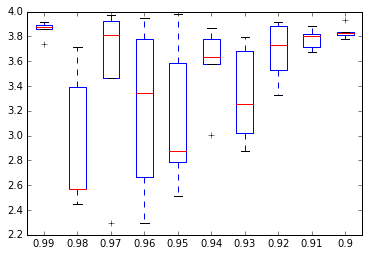

In [190]:
a= plt.boxplot([v100,v99,v98,v97,v96,v95,v94,v93,v92,v91])
b=plt.xticks(range(1,11),[i/100. for i in range(99,89,-1)])
# plt.ylim(-.25,1)

In [93]:
t_95 = []
for i,f in enumerate(t0_f):
    if f[1] <= 0.95:
        t_95.append(i)
        break
for i,f in enumerate(t1_f):
    if f[1] <= 0.95:
        t_95.append(i)
        break
for i,f in enumerate(t2_f):
    if f[1] <= 0.95:
        t_95.append(i)
        break
for i,f in enumerate(t3_f):
    if f[1] <= 0.95:
        t_95.append(i)
        break
for i,f in enumerate(t4_f):
    if f[1] <= 0.95:
        t_95.append(i)
        break

In [94]:
t0_vis = []
for v in t0_vi[0:100]:
    t0_vis.append(v[1])
t1_vis = []
for v in t1_vi[0:100]:
    t1_vis.append(v[1])
t2_vis = []
for v in t2_vi[0:100]:
    t2_vis.append(v[1])
t3_vis = []
for v in t3_vi[0:100]:
    t3_vis.append(v[1])
t4_vis = []
for v in t4_vi[0:100]:
    t4_vis.append(v[1])

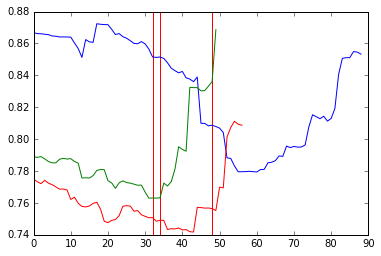

In [95]:
fig = plt.figure()
plt.axvline(x=t_95[0], color='red')
# plt.axvline(x=t_95[1], color='red')
# plt.axvline(x=t_95[2], color='red')
plt.axvline(x=t_95[3], color='red')
plt.axvline(x=t_95[4], color='red')
plt.plot(t0_vis)
# plt.plot(t1_vis)
# plt.plot(t2_vis)
plt.plot(t3_vis)
plt.plot(t4_vis)

In [71]:
t0_vis

[]

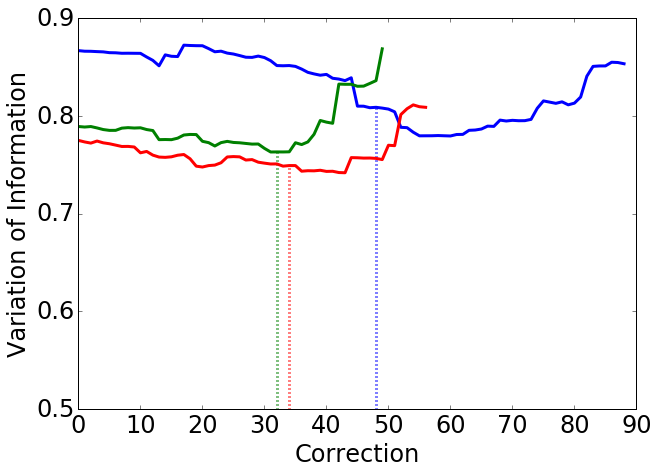

In [221]:

fig = plt.figure(figsize=(10,7))
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 24}
plt.rc('font', **font)

plt.axvline(x=t_95[0], ymax=.77, color='blue', linewidth=3, linestyle=':')
# plt.axvline(x=t_95[1], color='red')
# plt.axvline(x=t_95[2], color='red')
plt.axvline(x=t_95[3], ymax=0.66, color='green', linewidth=3, linestyle=':')
plt.axvline(x=t_95[4], ymax=0.62, color='red', linewidth=3, linestyle=':')
plt.plot(t0_vis, color='blue', linewidth=3)
# plt.plot(t1_vis)
# plt.plot(t2_vis)
plt.plot(t3_vis, color='green', linewidth=3)
plt.plot(t4_vis, color='red', linewidth=3)
plt.ylabel('Variation of Information')
plt.xlabel('Correction')
plt.ylim(0.5,0.9)
plt.yticks(np.arange(0.5, 0.91, 0.1))

plt.savefig('/home/d/PAPERGFX/ptplot.pdf')
